## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('saham_n_crypto5y.csv')
df = df[df['Symbol'] == 'TLKM']
df.head()

Symbol        Date    Open    High     Low   Close    Adj Close  \
2522   TLKM  2016-01-04  3080.0  3175.0  3080.0  3140.0  2681.680176   
2523   TLKM  2016-01-05  3125.0  3225.0  3125.0  3195.0  2728.652344   
2524   TLKM  2016-01-06  3250.0  3385.0  3220.0  3250.0  2775.624756   
2525   TLKM  2016-01-07  3200.0  3250.0  3155.0  3210.0  2741.463135   
2526   TLKM  2016-01-08  3170.0  3190.0  3130.0  3145.0  2685.950684   

           Volume  
2522   53937600.0  
2523  111298000.0  
2524  126669200.0  
2525  106056300.0  
2526  121217800.0

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 2522 to 3782
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     1261 non-null   object 
 1   Date       1261 non-null   object 
 2   Open       1260 non-null   float64
 3   High       1260 non-null   float64
 4   Low        1260 non-null   float64
 5   Close      1260 non-null   float64
 6   Adj Close  1260 non-null   float64
 7   Volume     1260 non-null   float64
dtypes: float64(6), object(2)
memory usage: 88.7+ KB


In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   3824.182540  3865.531746  3784.055556  3824.000000  3401.200234   
std     469.682567   465.269182   473.814415   471.644024   391.944389   
min    2550.000000  2590.000000  2450.000000  2560.000000  2373.389404   
25%    3527.500000  3600.000000  3500.000000  3540.000000  3163.232178   
50%    3880.000000  3910.000000  3840.000000  3870.000000  3414.693237   
75%    4170.000000  4202.500000  4130.000000  4170.000000  3658.336731   
max    4800.000000  4840.000000  4780.000000  4800.000000  4251.280273   

             Volume  
count  1.260000e+03  
mean   9.679703e+07  
std    6.361927e+07  
min    0.000000e+00  
25%    5.969445e+07  
50%    8.386790e+07  
75%    1.177860e+08  
max    6.241426e+08

In [5]:
df.shape

(1261, 8)

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1261, 8)

### Check Data Types

In [8]:
df.dtypes

Symbol        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Symbol               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

### Check Missing Value

In [11]:
df.isnull().sum()

Symbol       0
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Exploratory Data Analysis

### TLKM 2016-2020 Candlestick Chart

In [14]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

df_tlkm5y = df.query("""`Symbol` == 'TLKM'""")

chart_data = pd.concat([
	df_tlkm5y['Date'],
	df_tlkm5y['Open'],
	df_tlkm5y['Close'],
	df_tlkm5y['High'],
	df_tlkm5y['Low'],
], axis=1)
chart_data = chart_data.sort_values(['Date'])

chart = [go.Candlestick(
	x=chart_data['Date'], open=chart_data['Open'], close=chart_data['Close'],
	high=chart_data['High'], low=chart_data['Low'],
)]
figure = go.Figure(data=chart, layout=go.Layout({
    'legend': {'orientation': 'h', 'x': 0.99, 'xanchor': 'right', 'y': 1.1, 'yanchor': 'top'},
    'xaxis': {'tickmode': 'array',
              'ticktext': ['2016-01-04', '2016-03-08', '2016-05-16', '2016-07-25',
                           '2016-09-28', '2016-11-30', '2017-02-03', '2017-04-10',
                           '2017-06-19', '2017-08-21', '2017-10-23', '2017-12-25',
                           '2018-02-26', '2018-04-30', '2018-07-02', '2018-09-03',
                           '2018-11-05', '2019-01-07', '2019-03-11', '2019-05-13',
                           '2019-07-16', '2019-09-17', '2019-11-19', '2020-01-27',
                           '2020-03-31', '2020-06-11', '2020-08-14', '2020-10-21',
                           '2020-12-30'],
              'tickvals': [0, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495,
                           540, 585, 630, 675, 720, 765, 810, 855, 900, 945, 990,
                           1035, 1080, 1125, 1170, 1215, 1259],
              'type': 'category'}
}))
figure.show()

### Variable Correlation

In [15]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

In [16]:
sns.pairplot(data=df)

## Modelling

### Multiple Linear Regression

#### Data Partition

In [17]:
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df.loc[:,'Close']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

#### Build Model

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

#### Model Predictions

In [21]:
pred = lin_reg.predict(x_test)

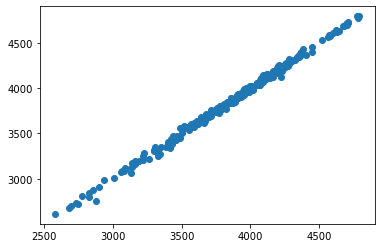

In [22]:
plt.scatter(y_test, pred)

#### Model Evaluation

In [23]:
print(lin_reg.intercept_)

-38.688468027042745


In [24]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Open      -4.938323e-01
High       7.150966e-01
Low        7.095197e-01
Adj Close  8.930983e-02
Volume    -1.684035e-08

In [25]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.15234718684453
MSE: 671.1714133742988
RMSE: 25.906976152656235
R2 Square 0.9968655984885916
__________________________________
Train set evaluation:
_____________________________________
MAE: 18.22102161796907
MSE: 585.7813241846706
RMSE: 24.202919745036354
R2 Square 0.997385104639199
__________________________________


In [26]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

Model        MAE         MSE       RMSE  R2 Square
0  Linear Regression  19.152347  671.171413  25.906976   0.996866

#### Real Data Predictions (2021 Q1-Q2)

In [27]:
tlkm_pred = pd.read_csv("tlkm_pred.csv")
tlkm_pred['Date'] = pd.to_datetime(tlkm_pred['Date'])

In [28]:
x_pred = tlkm_pred[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y_pred = tlkm_pred.loc[:,'Close']

In [29]:
pred = lin_reg.predict(x_pred)

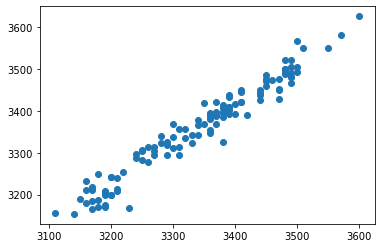

In [30]:
plt.scatter(y_pred, pred)

In [31]:
pred_set = lin_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 25.483183587266144
MSE: 984.368205251777
RMSE: 31.37464271114138
R2 Square 0.9231833653250937
__________________________________


### Lasso Regression

#### Build Model

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
model = Lasso()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [33]:
CV_lasso = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, n_jobs = None or 1)
CV_lasso.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 147500.5993277009, tolerance: 11228.049955357144

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 137376.01212864663, tolerance: 11352.841066468256

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 147500.5993277009, tolerance: 11228.049955357144

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 137376.012128

GridSearchCV(cv=2, estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [34]:
CV_lasso.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'tol': 0.0001,
 'warm_start': True}

In [35]:
CV_lasso.best_score_

0.9973696113415067

In [36]:
# With GridSearch

test_pred = CV_lasso.predict(x_test)
train_pred = CV_lasso.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.12308652313461
MSE: 670.1495851165713
RMSE: 25.887247538441997
R2 Square 0.996870370473768
__________________________________
Train set evaluation:
_____________________________________
MAE: 18.209521189941746
MSE: 585.8257564937015
RMSE: 24.20383763979798
R2 Square 0.9973849062958344
__________________________________


In [37]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0  Linear Regression  19.152347  671.171413  25.906976   0.996866
1   Lasso Regression  19.123087  670.149585  25.887248   0.996870

#### Real Data Predictions (2021 Q1-Q2)

In [38]:
pred = CV_lasso.predict(x_pred)

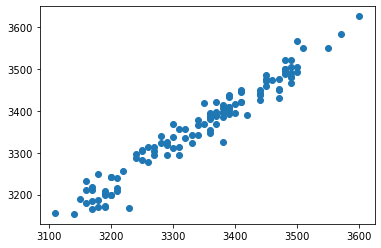

In [39]:
plt.scatter(y_pred, pred)

In [40]:
pred_set = CV_lasso.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 25.402050994199286
MSE: 980.1528490247883
RMSE: 31.30739288131141
R2 Square 0.9235123169080335
__________________________________


### Elastic Net Regression

#### Build Model

In [41]:
# With GridSearch

from sklearn.linear_model import ElasticNet
model = ElasticNet()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'l1_ratio' : [0.1, 0.5, 0.9, 1],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [42]:
CV_enet = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_enet.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 153716.7321759313, tolerance: 11228.049955357144

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 140068.83915558472, tolerance: 11352.841066468256

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 153716.7321759313, tolerance: 11228.049955357144

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 140068.839155

GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.5, 0.9, 1],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [43]:
CV_enet.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'tol': 0.0001,
 'warm_start': True}

In [44]:
CV_enet.best_score_

0.997369613680471

In [45]:
test_pred = CV_enet.predict(x_test)
train_pred = CV_enet.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.122855761276305
MSE: 670.1445908724044
RMSE: 25.887151076787195
R2 Square 0.996870393797119
__________________________________
Train set evaluation:
_____________________________________
MAE: 18.20946403614447
MSE: 585.8265346784581
RMSE: 24.203853715440815
R2 Square 0.9973849028220608
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0       Linear Regression  19.152347  671.171413  25.906976   0.996866
1        Lasso Regression  19.123087  670.149585  25.887248   0.996870
2  Elastic Net Regression  19.122856  670.144591  25.887151   0.996870

#### Real Data Predictions (2021 Q1-Q2)

In [47]:
pred = CV_enet.predict(x_pred)

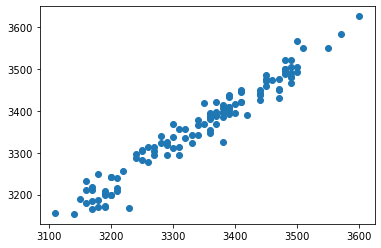

In [48]:
plt.scatter(y_pred, pred)

In [49]:
pred_set = CV_enet.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 25.402305411455895
MSE: 980.1788943514719
RMSE: 31.307808839832145
R2 Square 0.9235102844222887
__________________________________


### Random Forest Regressor

#### Build Model

In [50]:
# With GridSearch

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'criterion' : ['mae','mse'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False],
    'oob_score' : [True, False],
    'warm_start' : [True, False]
}

In [51]:
CV_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_rf.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True


C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mae', 'mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [52]:
CV_rf.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'log2',
 'n_estimators': 1000,
 'oob_score': False,
 'warm_start': True}

In [53]:
CV_rf.best_score_

0.9963108917327786

In [54]:
test_pred = CV_rf.predict(x_test)
train_pred = CV_rf.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18.897261904761937
MSE: 791.8610369047626
RMSE: 28.140025531345252
R2 Square 0.9963019723703347
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0        Linear Regression  19.152347  671.171413  25.906976   0.996866
1         Lasso Regression  19.123087  670.149585  25.887248   0.996870
2   Elastic Net Regression  19.122856  670.144591  25.887151   0.996870
3  Random Forest Regressor  18.897262  791.861037  28.140026   0.996302

#### Real Data Predictions (2021 Q1-Q2)

In [56]:
pred = CV_rf.predict(x_pred)

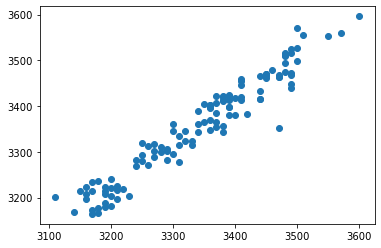

In [57]:
plt.scatter(y_pred, pred)

In [58]:
pred_set = CV_rf.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 26.83756302521007
MSE: 1124.9293563025199
RMSE: 33.53996655189924
R2 Square 0.9122144671707821
__________________________________


### Support Vector Machine

#### Feature Scalling

In [59]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scalar', StandardScaler()) ])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

#### Build Model

In [60]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18.424666317084736
MSE: 987.029884600039
RMSE: 31.417031759859796
R2 Square 0.9953905248339737
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.06761445066024
MSE: 299.2142318954307
RMSE: 17.297810031776585
R2 Square 0.9986643242545193
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE         MSE       RMSE  R2 Square
0        Linear Regression  19.152347  671.171413  25.906976   0.996866
1         Lasso Regression  19.123087  670.149585  25.887248   0.996870
2   Elastic Net Regression  19.122856  670.144591  25.887151   0.996870
3  Random Forest Regressor  18.897262  791.861037  28.140026   0.996302
4            SVM Regressor  18.424666  987.029885  31.417032   0.995391

#### Real Data Predictions (2021 Q1-Q2)

In [63]:
pred = svm_reg.predict(x_pred)

In [64]:
plt.scatter(y_pred, pred)

In [65]:
pred_set = svm_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 223.5250728317259
MSE: 62468.053512483224
RMSE: 249.9360988582546
R2 Square -3.8747873203539323
__________________________________


## Models Comparison

<AxesSubplot:ylabel='Model'>

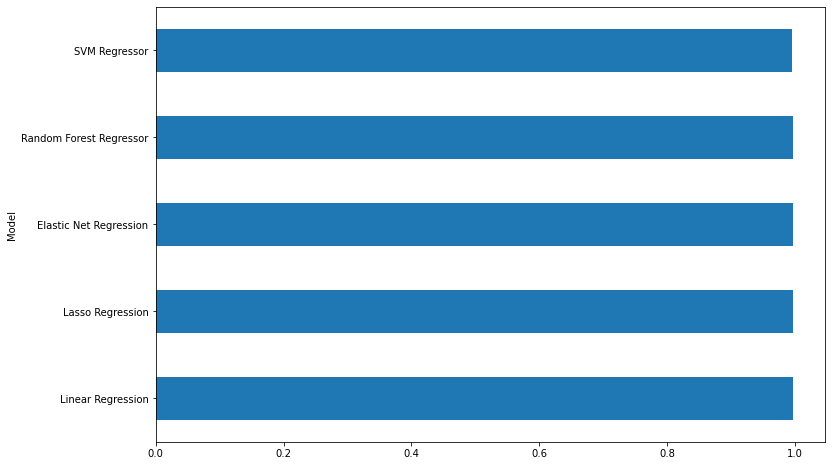

In [66]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

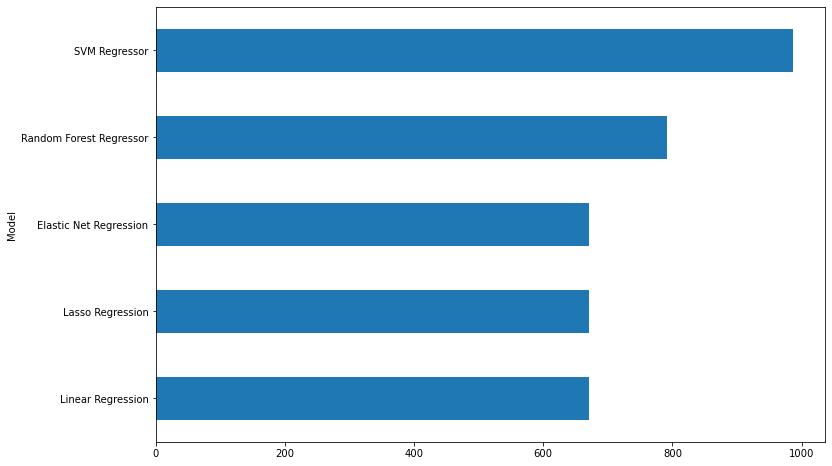

In [67]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))